# Task 3.1+ Unsupervised Learning
### Modul 12: Application of Machine Learning in Health Care
**Author:** Markus Schwaiger

**Date:** April 21, 2024

---

- Load dataset food.csv
- Preprocess data using z-transformation
- Apply KMeans for different number of clusters by varying k from 2 to 5. Calculate the Silhouette coefficient and select the final number of clusters
- Visualize the final kMeans clustering using PCA
- Create a hierarchical clustering and plot the dendrogram. In addition, create a heatmap with a clustering of samples and variables
- Create a density based clustering
- Update your git-repository.

In [189]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
from sklearn import metrics

## Load and scale dataset food.csv

In [183]:
food = pd.read_csv("../data/food.csv", index_col=0) # first column is used as row names
scaler = StandardScaler()
food_scale = scaler.fit_transform(food)

## Perform KMeans clustering for different numbers of clusters (k = 2 to 5)

In [186]:
silhouette_scores = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=123).fit(food_scale)
    labels = kmeans.labels_
    silhouette_score = metrics.silhouette_score(food_scale, labels)
    silhouette_scores.append(silhouette_score)
    print(f"Silhouette score for k={k}: {silhouette_score}")

Silhouette score for k=2: 0.3271084145417136
Silhouette score for k=3: 0.34838222908871225
Silhouette score for k=4: 0.2966156748911452
Silhouette score for k=5: 0.25053752400240825


## Select the optimal number of clusters based on the silhouette coefficient

In [187]:
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 because index starts at 0
print(f"Optimal number of clusters: {optimal_k}")
final_kmeans = KMeans(n_clusters=optimal_k, random_state=123).fit(food_scale)

Optimal number of clusters: 3


## Visualize the final KMeans clustering using PCA

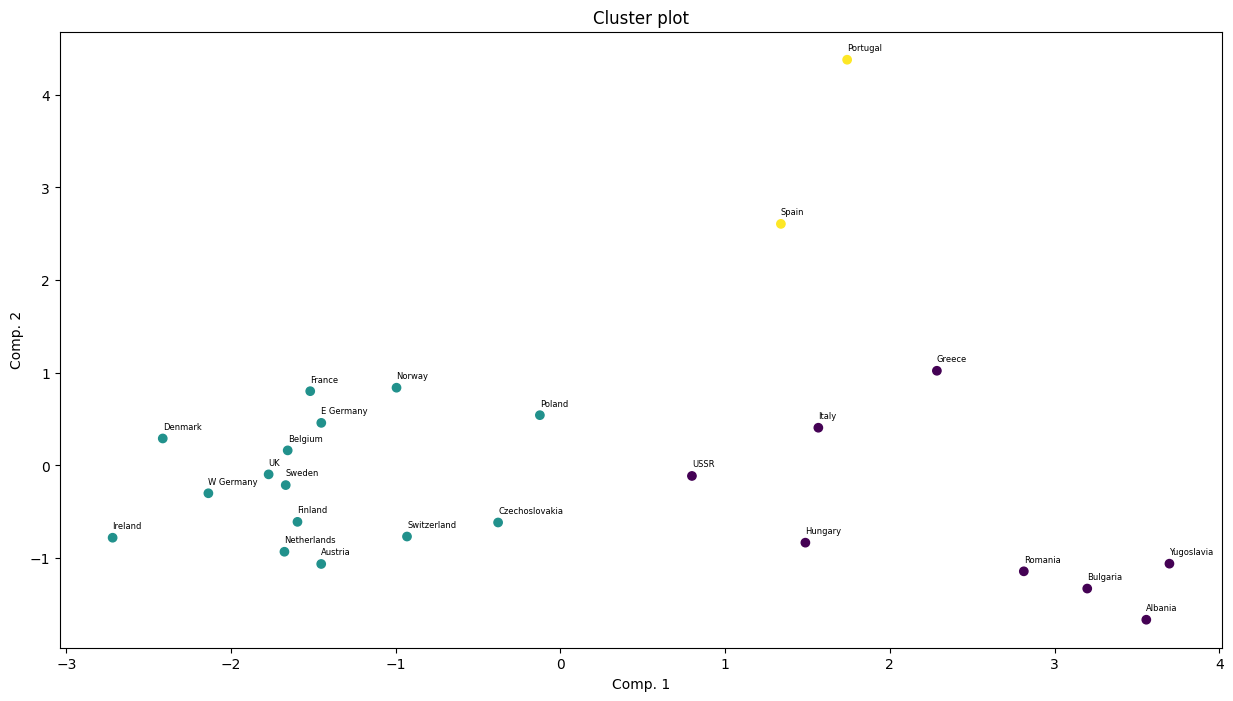

In [140]:
pca = PCA(n_components=2)
food_red = pca.fit_transform(food_scale)

plt.figure(figsize=(15, 8))
plt.scatter(food_red[:, 0], food_red[:, 1], c=final_kmeans.labels_)
for i, txt in enumerate(food.index):
    plt.text(food_red[i, 0], food_red[i, 1] + 0.1, txt, fontsize=6)
plt.title("Cluster plot")
plt.xlabel("Comp. 1")
plt.ylabel("Comp. 2")
plt.show()

## Hierarchical clustering

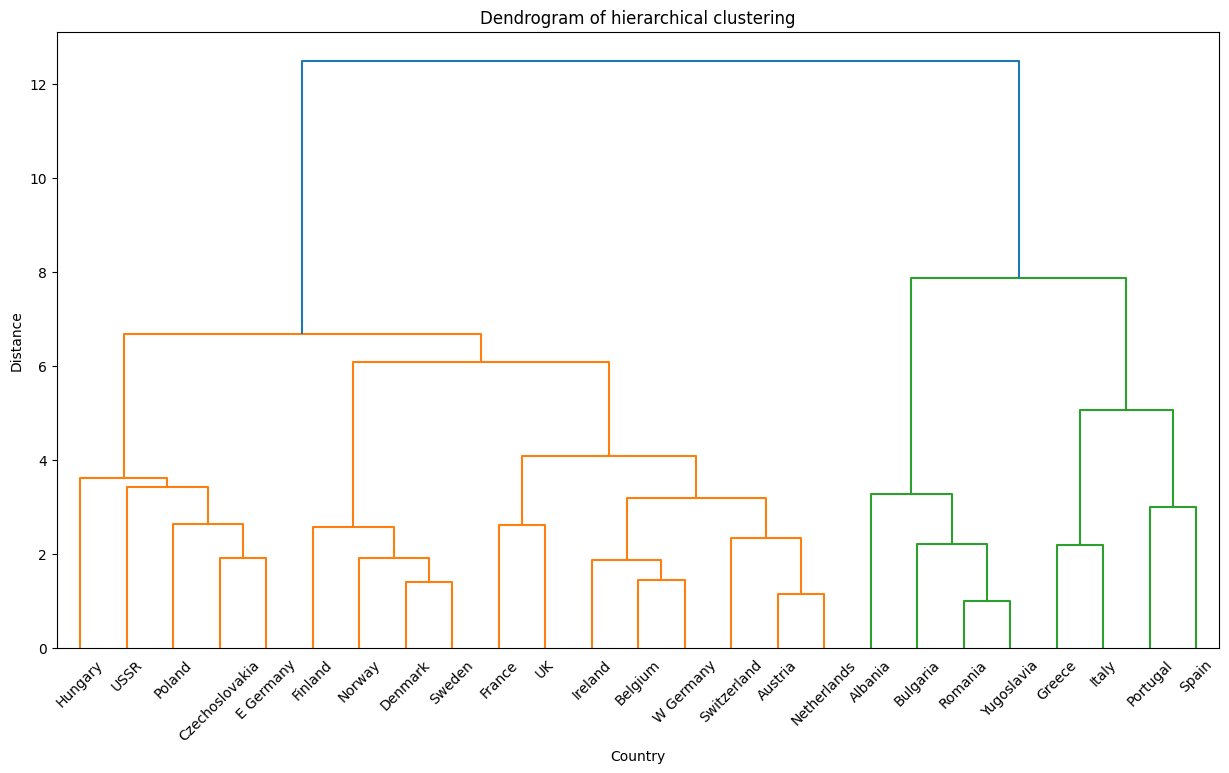

In [196]:
linked = linkage(food_scale, "ward")

plt.figure(figsize=(15, 8))
dendrogram(linked, orientation="top", labels=food.index.tolist(), distance_sort="ascending", show_leaf_counts=True)
plt.title("Dendrogram of hierarchical clustering")
plt.xlabel("Country")
plt.ylabel("Distance")
plt.show()

## Density based clustering

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


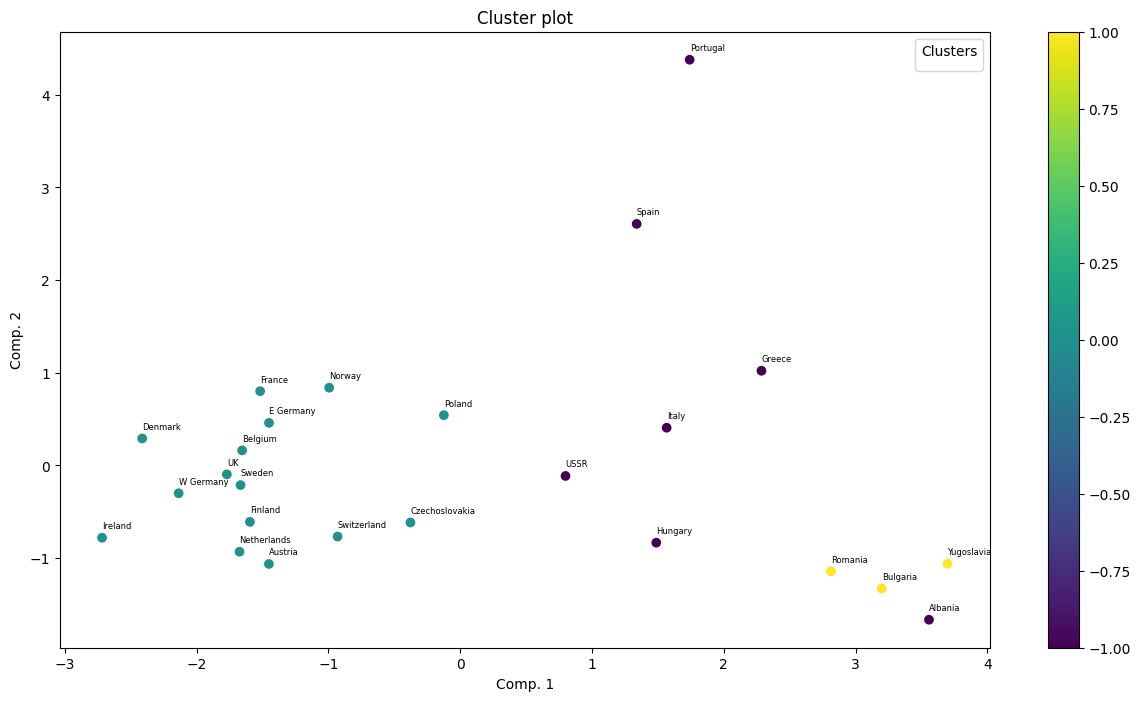

In [192]:
dbc = DBSCAN(eps=2.5, min_samples=3).fit(food_scale)
plt.figure(figsize=(15,8))
plt.scatter(food_red[:, 0], food_red[:, 1], c=dbc.labels_)
for i, txt in enumerate(food.index):
    plt.text(food_red[i, 0], food_red[i, 1] + 0.1, txt, fontsize=6)
plt.xlabel("Comp. 1")
plt.ylabel("Comp. 2")
plt.title("Cluster plot")
plt.legend(title="Clusters")
plt.colorbar()
plt.show()